In [1]:
import os
print (os.path.abspath("."))

c:\Users\yxm02\.ipynb_checkpoints\ISLP


In [36]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc("axes",labelweight="bold",labelsize="large",titleweight="bold", titlesize=14,titlepad=10,)
plot_params = dict(color="0.75",style=".-",markeredgecolor="0.25", markerfacecolor="0.25",legend=False,)
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style(style='darkgrid', rc={'axes.facecolor': '.9', 'grid.color': '.8'})
sns.set_palette(palette='husl')
sns.set_theme()

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.datasets import get_rdataset

from ISLP import load_data

In [4]:
# I Load and understand the data
USArrests=get_rdataset('USArrests').data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
USArrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [6]:
USArrests.shape

(50, 4)

In [7]:
USArrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
# II Scale and PCA
scaler=StandardScaler(with_mean=True,with_std=True)
USArrests_scaled=scaler.fit_transform(USArrests)
USArrests_scaled[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [9]:
pca_USArrests = PCA().fit(USArrests_scaled)

In [10]:
pca_USArrests.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [11]:
loadings=pd.DataFrame(pca_USArrests.components_,
                      index=['PC1', 'PC2','PC3', 'PC4'],
                      columns=USArrests.columns)             
loadings

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319
PC3,-0.341233,-0.268148,-0.378016,0.817778
PC4,0.649228,-0.743407,0.133878,0.089024


In [15]:
pca_USArrests.components_.shape

(4, 4)

In [12]:
scores=pd.DataFrame(pca_USArrests.transform(USArrests_scaled),
                    columns=['PC1', 'PC2','PC3', 'PC4'],
                    index=USArrests.index)
scores.head()

,PC1,PC2,PC3,PC4
rownames,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [15]:
scores.shape, scores.shape[1] 
# shape[1]  cols number of array  range(pca_USArrests.components_.shape[1]) i.e number of features

((50, 4), 4)

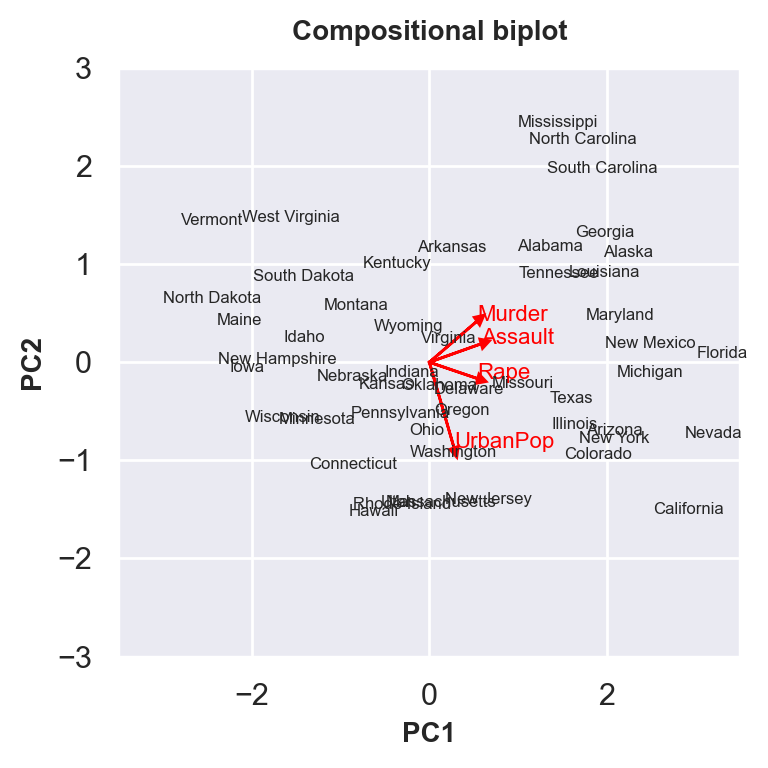

In [33]:
fig, ax = plt.subplots(figsize = (4, 4))
ax.scatter(scores[:,0],scores[:,1], marker='') # Plot PC1 and PC2 

ax.set_xlim ([-3.5,3.5]) 
ax.set_ylim ([-3,3])
ax.set_xlabel('PC1', fontsize=10) 
ax.set_ylabel('PC2', fontsize=10)
ax.set_title('Compositional biplot', fontsize=10) 

for i in range(pca_USArrests.components_.shape[1]): # Iterate each feature, range(4)
    ax.arrow(0, 0, pca_USArrests.components_[0,i], pca_USArrests.components_[1,i],
    head_width=0.1, head_length=0.1,color="red") # X y position of the arrow ; Length and width of the head
    # For each feature, arrow begins from coordinate axis origin, X=loading of PC1, y=loading of PC2
    ax.text(pca_USArrests.components_[0,i], pca_USArrests.components_[1,i], USArrests.columns[i],
    fontsize=8, color="red") # Test position, content and size 

for i, label in enumerate(USArrests.index): 
    ax.text(scores[i,0],scores[i,1], str(label), fontsize=6)
    # Test position and content for each observation

In [19]:
pca_USArrests.explained_variance_ # Total variance explained by 4 PCA

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [20]:
scores.std(axis=0, ddof=1)
# axis=0，based on col; axis=1, based on row
# ddof = 0，standard error of population，/n in compute formula。 ddof = 1，sample standard error, /(n-1）in compute formula.

array([1.5908673 , 1.00496987, 0.6031915 , 0.4206774 ])

In [21]:
scores.var(axis=0, ddof=1) # The same result as extracted from PCA 

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [22]:
pca_USArrests.explained_variance_ratio_ 

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [38]:
cum_var=pca_USArrests.explained_variance_ratio_.cumsum()
cum_var[2]

0.956642478067541

In [24]:
np.arange(pca_USArrests.n_components_)+1

array([1, 2, 3, 4])

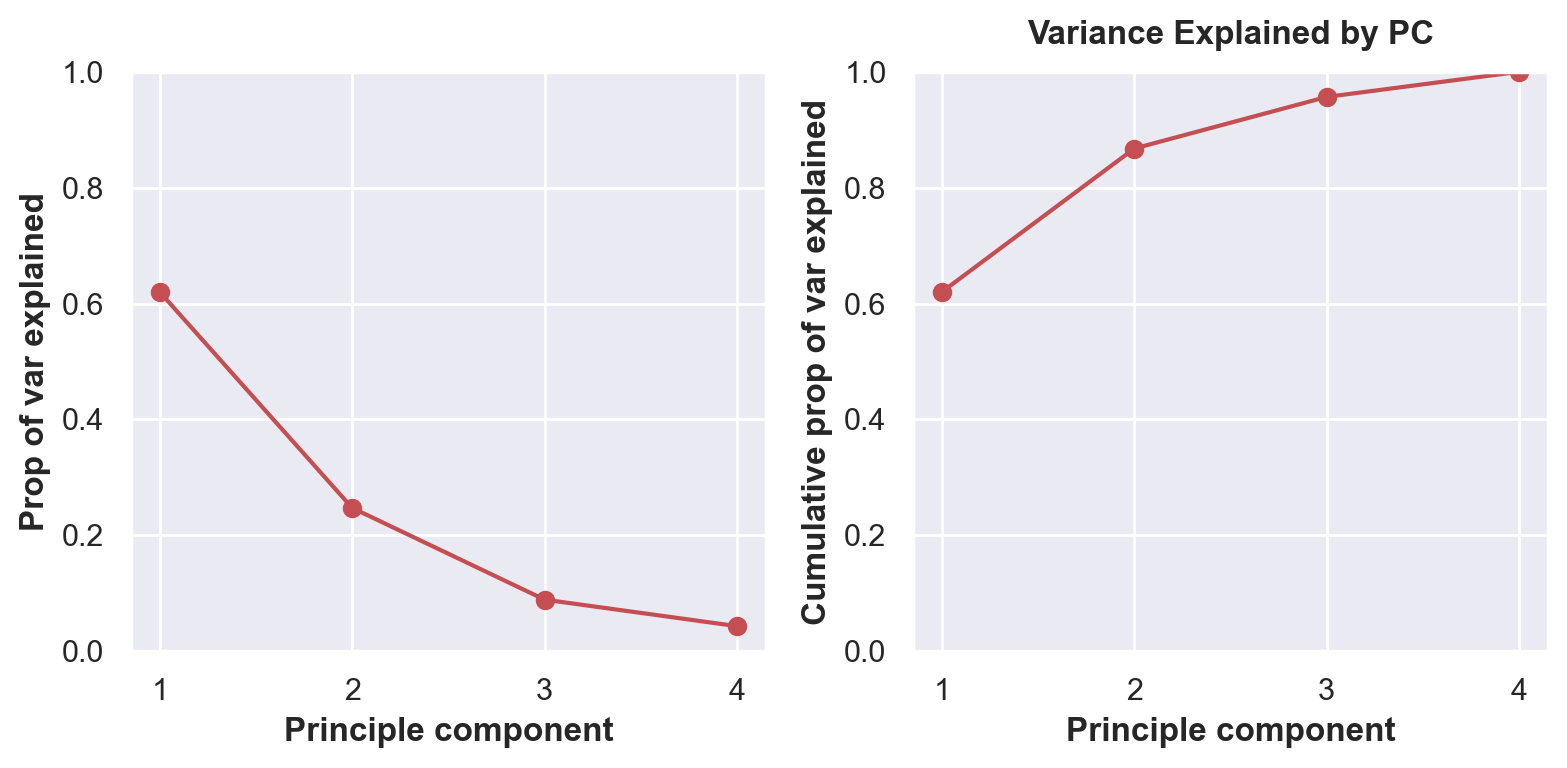

In [71]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))
plt.title('Variance Explained by PC')
ticks = np.arange(pca_USArrests.n_components_)+1  # num of array+1 i.e total num of PCA 4

ax = axes[0]
ax.plot(ticks, pca_USArrests.explained_variance_ratio_, marker='o', linestyle='-', color='r')
ax.set_xlabel('Principle component')
ax.set_ylabel('Prop of var explained')
ax.set_ylim ([0,1])
ax.set_xticks(ticks)
ax.grid(True)

ax = axes[1]  # cumsum() 
ax.plot(ticks, pca_USArrests.explained_variance_ratio_.cumsum(), marker='o', linestyle='-', color='r')
ax.set_xlabel('Principle component')
ax.set_ylabel('Cumulative prop of var explained')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
ax.grid(True)

In [63]:
fig = px.scatter_3d(
    scores, x=0, y=1, z=2,
    title=f'Total Explained Variance: {cum_var[2]:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [49]:
# Matrix Completion 
# V = loading matrix  U=standardized version of score matrix    U.D = SCORE MATRIX
X=USArrests_scaled
U, D, V = np.linalg.svd(X,full_matrices=False)   
U.shape, D.shape, V.shape

((50, 4), (4,), (4, 4))

In [50]:
V

array([[-0.53589947, -0.58318363, -0.27819087, -0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864],
       [-0.34123273, -0.26814843, -0.37801579,  0.81777791],
       [ 0.6492278 , -0.74340748,  0.13387773,  0.08902432]])

In [51]:
U[:3]

array([[-0.08850212,  0.16111249, -0.10521861,  0.0530665 ],
       [-0.17511901,  0.15255799,  0.48314515, -0.14893782],
       [-0.15832905, -0.10603826,  0.01297404, -0.2834384 ]])

In [52]:
D

array([11.13607107,  7.0347891 ,  4.22234047,  2.94474182])

In [55]:
(U*D)[:3] 

array([[-0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [-1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [-1.76316354, -0.74595678,  0.05478082, -0.83465292]])

In [56]:
scores[:3]

array([[ 0.98556588,  1.13339238, -0.44426879,  0.15626714],
       [ 1.95013775,  1.07321326,  2.04000333, -0.43858344],
       [ 1.76316354, -0.74595678,  0.05478082, -0.83465292]])

In [57]:
# III Missing values
XX=USArrests_scaled
XX[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [58]:
n_omit = 20
np.random.seed(15)
row_idx=np.random.choice(np.arange(XX.shape[0]), n_omit, replace=False) #随机选出20个行INDEX
row_idx

array([35, 37, 41, 26, 38, 43,  3, 33, 30, 36, 14, 16, 20,  9, 44, 47, 49,
       22, 25, 42])

In [59]:
column_idx=np.random.choice(np.arange(XX.shape[1]), n_omit, replace=True) 
# 20 cols index
column_idx

array([3, 3, 0, 1, 0, 1, 3, 1, 0, 0, 3, 1, 1, 0, 0, 2, 2, 0, 1, 2])

In [60]:
Xna=X.copy()
Xna[row_idx,column_idx]

array([-0.13286962, -0.68289807,  1.25517927, -0.83345379, -1.01768785,
       -0.61527217, -0.18679398, -1.52436225,  0.83771388, -0.66980002,
       -1.07115345, -0.74860538, -0.26375734,  2.22926518, -1.29599811,
       -1.85215107, -0.38662083, -1.1800355 , -0.74860538,  1.00912225])

In [61]:
Xna[row_idx,column_idx]=np.nan # set these values as 0
Xna[row_idx,column_idx]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [62]:
Xna[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238,         nan],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [64]:
def low_rank (X, M=1):   
    U,D,V=np.linalg.svd(X)
    L=U[:,:M]*D[:M]
    return L.dot(V[:M]) 

In [65]:
Xhat= Xna.copy()
Xbar=np.nanmean(Xhat,axis=0) # Mean of missing values
Xbar

array([-0.00368923,  0.10759219,  0.02616276,  0.04508076])

In [66]:
Xhat[row_idx,column_idx]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan])

In [67]:
Xhat[row_idx,column_idx]=Xbar[column_idx]  # Implementation with mean

In [68]:
thresh = 1e-7
rel_err = 1
count = 0
ismiss = np.isnan(Xna)
mssold = np.mean(Xhat[~ismiss]**2)
mss0 = np.mean(Xna[~ismiss]**2)

In [69]:
while rel_err > thresh:
    count += 1
# Step 2(a)
    Xapp = low_rank(Xhat, M=1)
# Step 2(b)
    Xhat[ismiss] = Xapp[ismiss]
# Step 2(c)
    mss = np.mean(((Xna - Xapp)[~ismiss])**2)
    rel_err = (mssold - mss) / mss0
    mssold = mss
    print("Iteration: {0}, MSS:{1:.3f}, Rel.Err {2:.2e}".format(count, mss, rel_err))

Iteration: 1, MSS:0.395, Rel.Err 5.99e-01
Iteration: 2, MSS:0.382, Rel.Err 1.33e-02
Iteration: 3, MSS:0.381, Rel.Err 1.44e-03
Iteration: 4, MSS:0.381, Rel.Err 1.79e-04
Iteration: 5, MSS:0.381, Rel.Err 2.58e-05
Iteration: 6, MSS:0.381, Rel.Err 4.22e-06
Iteration: 7, MSS:0.381, Rel.Err 7.65e-07
Iteration: 8, MSS:0.381, Rel.Err 1.48e-07
Iteration: 9, MSS:0.381, Rel.Err 2.95e-08


In [70]:
np.corrcoef(Xapp[ismiss], X[ismiss])[0,1]

0.7113567434297362